In [1]:
import pandas as pd
from helpers import *
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns

In [31]:
games = pd.read_csv('games.csv', low_memory=False)
game_details = pd.read_csv('games_details.csv', low_memory=False)
teams = pd.read_csv('teams.csv',low_memory=False)

In [3]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0


In [4]:
kat_df = game_details[game_details['PLAYER_NAME'] == 'Karl-Anthony Towns']

In [5]:
kat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 2 to 535488
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GAME_ID            521 non-null    int64  
 1   TEAM_ID            521 non-null    int64  
 2   TEAM_ABBREVIATION  521 non-null    object 
 3   TEAM_CITY          521 non-null    object 
 4   PLAYER_ID          521 non-null    int64  
 5   PLAYER_NAME        521 non-null    object 
 6   NICKNAME           67 non-null     object 
 7   START_POSITION     507 non-null    object 
 8   COMMENT            14 non-null     object 
 9   MIN                507 non-null    object 
 10  FGM                507 non-null    float64
 11  FGA                507 non-null    float64
 12  FG_PCT             507 non-null    float64
 13  FG3M               507 non-null    float64
 14  FG3A               507 non-null    float64
 15  FG3_PCT            507 non-null    float64
 16  FTM                507 

In [6]:
kat_df = kat_df.drop(['START_POSITION','PLAYER_NAME','GAME_ID', 'TEAM_ID','TEAM_ABBREVIATION','TEAM_CITY', 'PLAYER_ID','NICKNAME','COMMENT'],axis=1)

In [7]:
kat_df.reset_index(drop=True)

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,25:17,4.0,9.0,0.444,1.0,3.0,0.333,6.0,8.0,0.750,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
1,33:52,6.0,14.0,0.429,1.0,5.0,0.200,8.0,8.0,1.000,2.0,11.0,13.0,4.0,2.0,2.0,3.0,5.0,21.0,2.0
2,29:14,4.0,5.0,0.800,0.0,0.0,0.000,5.0,6.0,0.833,2.0,9.0,11.0,4.0,0.0,3.0,5.0,2.0,13.0,20.0
3,24:03,8.0,14.0,0.571,1.0,1.0,1.000,10.0,15.0,0.667,7.0,6.0,13.0,1.0,1.0,2.0,2.0,2.0,27.0,34.0
4,34:24,13.0,17.0,0.765,0.0,4.0,0.000,10.0,11.0,0.909,1.0,14.0,15.0,5.0,0.0,3.0,0.0,2.0,36.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,22:44,2.0,7.0,0.286,0.0,0.0,0.000,4.0,4.0,1.000,2.0,5.0,7.0,1.0,0.0,0.0,3.0,3.0,8.0,-10.0
517,19:49,4.0,7.0,0.571,0.0,1.0,0.000,4.0,5.0,0.800,3.0,3.0,6.0,0.0,0.0,3.0,1.0,0.0,12.0,-9.0
518,22:59,2.0,5.0,0.400,0.0,0.0,0.000,3.0,4.0,0.750,2.0,4.0,6.0,2.0,2.0,0.0,2.0,4.0,7.0,-10.0
519,23:01,4.0,9.0,0.444,0.0,0.0,0.000,5.0,5.0,1.000,3.0,7.0,10.0,0.0,1.0,1.0,1.0,4.0,13.0,-16.0


In [8]:
kat_df = kat_df.dropna()

In [9]:
kat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 2 to 535488
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MIN         507 non-null    object 
 1   FGM         507 non-null    float64
 2   FGA         507 non-null    float64
 3   FG_PCT      507 non-null    float64
 4   FG3M        507 non-null    float64
 5   FG3A        507 non-null    float64
 6   FG3_PCT     507 non-null    float64
 7   FTM         507 non-null    float64
 8   FTA         507 non-null    float64
 9   FT_PCT      507 non-null    float64
 10  OREB        507 non-null    float64
 11  DREB        507 non-null    float64
 12  REB         507 non-null    float64
 13  AST         507 non-null    float64
 14  STL         507 non-null    float64
 15  BLK         507 non-null    float64
 16  TO          507 non-null    float64
 17  PF          507 non-null    float64
 18  PTS         507 non-null    float64
 19  PLUS_MINUS  507 non-null  

In [10]:
kat_df['MIN'] = kat_df['MIN'].astype('string')
kat_df['MIN'] = round((kat_df['MIN'].apply(seconder) / 60),2)
kat_df.head()

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
2,25.28,4.0,9.0,0.444,1.0,3.0,0.333,6.0,8.0,0.750,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
168,33.87,6.0,14.0,0.429,1.0,5.0,0.200,8.0,8.0,1.000,2.0,11.0,13.0,4.0,2.0,2.0,3.0,5.0,21.0,2.0
605,29.23,4.0,5.0,0.800,0.0,0.0,0.000,5.0,6.0,0.833,2.0,9.0,11.0,4.0,0.0,3.0,5.0,2.0,13.0,20.0
994,24.05,8.0,14.0,0.571,1.0,1.0,1.000,10.0,15.0,0.667,7.0,6.0,13.0,1.0,1.0,2.0,2.0,2.0,27.0,34.0
1421,34.40,13.0,17.0,0.765,0.0,4.0,0.000,10.0,11.0,0.909,1.0,14.0,15.0,5.0,0.0,3.0,0.0,2.0,36.0,14.0


In [11]:
X = kat_df.copy()
y = X.pop("PTS")

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 2 to 535488
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MIN         507 non-null    float64
 1   FGM         507 non-null    float64
 2   FGA         507 non-null    float64
 3   FG_PCT      507 non-null    float64
 4   FG3M        507 non-null    float64
 5   FG3A        507 non-null    float64
 6   FG3_PCT     507 non-null    float64
 7   FTM         507 non-null    float64
 8   FTA         507 non-null    float64
 9   FT_PCT      507 non-null    float64
 10  OREB        507 non-null    float64
 11  DREB        507 non-null    float64
 12  REB         507 non-null    float64
 13  AST         507 non-null    float64
 14  STL         507 non-null    float64
 15  BLK         507 non-null    float64
 16  TO          507 non-null    float64
 17  PF          507 non-null    float64
 18  PLUS_MINUS  507 non-null    float64
dtypes: float64(19)
memory usag

### Classify Mutual Information Between Potential Features and Target Variable (PTS)

In [13]:
def get_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=False, n_neighbors=5)
    mi_scores = pd.Series(mi_scores, index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    print(mi_scores)

In [14]:
get_mi_scores(X, y)

FGM           0.948013
FGA           0.451480
FG3M          0.174376
FTA           0.152191
FTM           0.136995
MIN           0.134160
FG3_PCT       0.133323
FG_PCT        0.127191
FT_PCT        0.093689
FG3A          0.069049
PLUS_MINUS    0.037515
AST           0.032388
BLK           0.025562
OREB          0.018331
REB           0.013813
TO            0.012651
DREB          0.000000
STL           0.000000
PF            0.000000
dtype: float64


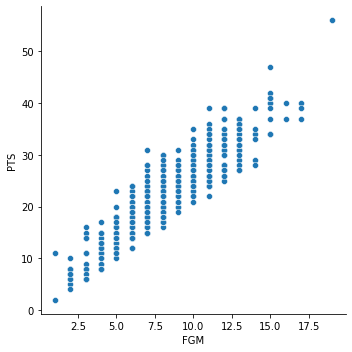

In [15]:
sns.relplot(x='FGM', y='PTS', data=kat_df)

#### Running MI scores on these features yields obvious results. More FGM = More pts. It may be possible to manufacture more advanced statistics that share more mutual information with the target variable. 

In [16]:
## Create effective field goal percentage statistic
## this stat weights a three-pointer to be worth one and ahlf times as much as a made two-pointer
kat_df['eFG'] = (kat_df['FGM'] + 1.5*kat_df['FG3M']) / kat_df['FGA']
## create true shooting percentage
## this stat takes into the consideration the difference between 2 pointers, 3 pointers, and free throws
kat_df['TS_PCT'] = kat_df['PTS'] / ((2 * kat_df['FGA']) + (0.88 * kat_df['FTA']))

In [17]:
kat_df.head()

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,eFG,TS_PCT
2,25.28,4.0,9.0,0.444,1.0,3.0,0.333,6.0,8.0,0.750,...,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0,0.611111,0.599042
168,33.87,6.0,14.0,0.429,1.0,5.0,0.200,8.0,8.0,1.000,...,13.0,4.0,2.0,2.0,3.0,5.0,21.0,2.0,0.535714,0.599315
605,29.23,4.0,5.0,0.800,0.0,0.0,0.000,5.0,6.0,0.833,...,11.0,4.0,0.0,3.0,5.0,2.0,13.0,20.0,0.800000,0.850785
994,24.05,8.0,14.0,0.571,1.0,1.0,1.000,10.0,15.0,0.667,...,13.0,1.0,1.0,2.0,2.0,2.0,27.0,34.0,0.678571,0.655340
1421,34.40,13.0,17.0,0.765,0.0,4.0,0.000,10.0,11.0,0.909,...,15.0,5.0,0.0,3.0,0.0,2.0,36.0,14.0,0.764706,0.824176


In [18]:
X = kat_df.copy()
y = X.pop('PTS')
get_mi_scores(X, y)

FGM           0.934933
FGA           0.456366
TS_PCT        0.235242
eFG           0.170229
FTA           0.143518
FG3_PCT       0.130860
FG_PCT        0.128099
MIN           0.125107
FT_PCT        0.119217
FTM           0.118068
FG3M          0.113416
FG3A          0.065040
PLUS_MINUS    0.052922
AST           0.041166
REB           0.032620
OREB          0.022929
TO            0.009208
PF            0.006156
DREB          0.000000
STL           0.000000
BLK           0.000000
dtype: float64


### TS% and/or eFG% could be useful for predicting player points, but it's likely external factors could provide better insights

In [27]:
game_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0


In [24]:
kat_df2 = game_details[game_details['PLAYER_NAME'] == 'Karl-Anthony Towns']

In [28]:
new_df = kat_df2.merge(games, how='inner', on=['GAME_ID'] )

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 0 to 522
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GAME_ID            523 non-null    int64  
 1   TEAM_ID            523 non-null    int64  
 2   TEAM_ABBREVIATION  523 non-null    object 
 3   TEAM_CITY          523 non-null    object 
 4   PLAYER_ID          523 non-null    int64  
 5   PLAYER_NAME        523 non-null    object 
 6   NICKNAME           67 non-null     object 
 7   START_POSITION     509 non-null    object 
 8   COMMENT            14 non-null     object 
 9   MIN                509 non-null    object 
 10  FGM                509 non-null    float64
 11  FGA                509 non-null    float64
 12  FG_PCT             509 non-null    float64
 13  FG3M               509 non-null    float64
 14  FG3A               509 non-null    float64
 15  FG3_PCT            509 non-null    float64
 16  FTM                509 non

In [30]:
new_kat_df = new_df[['MIN','FGM','FGA','PTS','VISITOR_TEAM_ID','PTS_home','FG_PCT_home','FT_PCT_home','FG3_PCT_home','AST_home','REB_home','PTS_away','FG_PCT_away','FT_PCT_away','FG3_PCT_away','AST_away','REB_away']]

In [38]:
team_abv = teams[['TEAM_ID','ABBREVIATION']]

In [39]:
new_kat_df.merge(team_abv, how='inner', left_on='VISITOR_TEAM_ID', right_on='TEAM_ID')

,MIN,FGM,FGA,PTS,VISITOR_TEAM_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,TEAM_ID,ABBREVIATION
0,25:17,4.0,9.0,15.0,1610612750,104.0,0.398,0.760,0.333,23.0,53.0,113.0,0.422,0.875,0.357,21.0,46.0,1610612750,MIN
1,33:52,6.0,14.0,21.0,1610612750,118.0,0.465,0.880,0.400,31.0,49.0,110.0,0.456,1.000,0.333,24.0,37.0,1610612750,MIN
2,25:16,7.0,13.0,20.0,1610612750,101.0,0.430,0.857,0.257,19.0,39.0,138.0,0.538,0.783,0.468,35.0,41.0,1610612750,MIN
3,34:14,7.0,13.0,17.0,1610612750,122.0,0.527,0.853,0.405,29.0,38.0,127.0,0.547,0.789,0.429,30.0,31.0,1610612750,MIN
4,22:18,5.0,12.0,15.0,1610612750,120.0,0.441,0.773,0.289,28.0,54.0,129.0,0.512,0.893,0.529,23.0,38.0,1610612750,MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,28:07,11.0,19.0,33.0,1610612749,107.0,0.448,0.656,0.364,16.0,54.0,125.0,0.457,0.778,0.361,24.0,45.0,1610612749,MIL
519,32:46,10.0,13.0,24.0,1610612749,108.0,0.538,0.850,0.368,27.0,39.0,89.0,0.376,0.760,0.207,19.0,43.0,1610612749,MIL
520,38:17,7.0,12.0,18.0,1610612749,116.0,0.558,0.810,0.520,30.0,34.0,99.0,0.541,0.647,0.444,22.0,29.0,1610612749,MIL
521,26:12,4.0,17.0,8.0,1610612749,85.0,0.393,0.667,0.214,19.0,47.0,95.0,0.427,0.821,0.500,20.0,48.0,1610612749,MIL
